In [12]:
%matplotlib inline
import time
from matplotlib import pyplot as plt
from collections import deque

#### Performance of the str.replace

In [4]:
def replace_performance():
    x=[10]
    # create a list with the following invariant: x[i] = floor(1.5 * x[i - 1])
    while x[-1] < 10 ** 8: x.append(int(x[-1] * 1.5))

    y = [0] * len(x)
    
    # a very bad case for replace. string is repeated substring to be replaced
    nst, sst = 'abcd', 'abcd'

    for ix, i in enumerate(x):
        # create the string of x[ix] repeated nst strings
        s = ''.join([nst] * i)
        # time the replacements
        t = time.time()
        s = s.replace(sst,'efgh')
        y[ix] = time.time() - t

    # actual length of the string is 4 * x[ix] forall ix in 0 <= ix < len(x)
    x = [a * len(nst) for a in x]
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.set_size_inches(8, 6)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('n (size of the string)')
    ax1.set_ylabel('t (total time of the algo)')
    _ = ax1.plot(x,y)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlabel('n (size of the string)')
    ax2.set_ylabel('t / n (time it takes per character)')
    _ = ax2.plot(x,[a / b for a, b in zip(x, y)])

[10, 15, 22, 33, 49, 73, 109, 163, 244, 366, 549, 823, 1234, 1851, 2776, 4164, 6246, 9369, 14053, 21079, 31618, 47427, 71140, 106710, 160065, 240097, 360145, 540217, 810325, 1215487, 1823230, 2734845, 4102267, 6153400, 9230100, 13845150, 20767725, 31151587, 46727380, 70091070, 105136605]


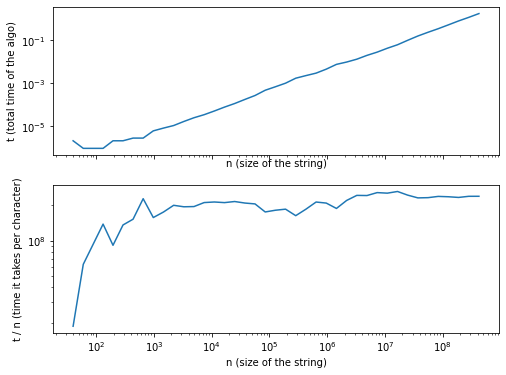

In [5]:
replace_performance()

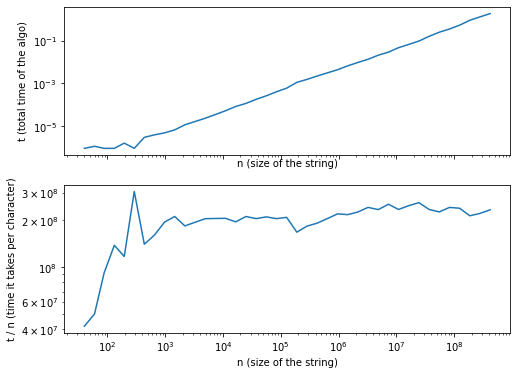

In [3]:
replace_performance()

In [ ]:
100 apples / 2 people     => 50 apples per 1 person
x   apples / y people     => r apples  per 1 person

In [ ]:
t          / n characters => r time units per 1 character 

In [ ]:
so as input size increases, it takes the same amount of time to process a single character.
so Pyhton's string replace, though theoretically takes O(...), empirically takes O(n) time.

#### How does array.array work?

In [7]:
from array import array

In [8]:
s = array("B")

In [9]:
s

array('B')

In [10]:
s.append(ord("a"))

In [11]:
s

array('B', [97])

In [ ]:
s

#### Performance gains of using deque (queue structure) to pop and appendleft versus list

In [55]:
l = list(range(1, 10 ** 8))
d = deque(l)

In [56]:
%timeit l.pop()

84.6 ns ± 1.82 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [57]:
%timeit d.pop()

85.4 ns ± 5.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
